In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Giai_CC

/content/drive/MyDrive/Colab Notebooks/Giai_CC


In [ ]:
import cv2,os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Giai_CC/image_.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Giai_CC/image_.zip
   creating: image_/
   creating: image_/test/
  inflating: image_/test/420-5.png   
  inflating: image_/test/420-5.txt   
  inflating: image_/test/421-0.png   
  inflating: image_/test/421-0.txt   
  inflating: image_/test/422-5.png   
  inflating: image_/test/422-5.txt   
  inflating: image_/test/423-2.png   
  inflating: image_/test/423-2.txt   
  inflating: image_/test/424-3.png   
  inflating: image_/test/424-3.txt   
  inflating: image_/test/425-4.png   
  inflating: image_/test/425-4.txt   
  inflating: image_/test/426-2.png   
  inflating: image_/test/426-2.txt   
  inflating: image_/test/427-1.png   
  inflating: image_/test/427-1.txt   
  inflating: image_/test/428-1.png   
  inflating: image_/test/428-1.txt   
  inflating: image_/test/429-2.png   
  inflating: image_/test/429-2.txt   
  inflating: image_/test/430-3.png   
  inflating: image_/test/430-3.txt   
  inflating: image_/test/431-1.png   
  inflating

In [ ]:
def cut_img(img):
  ls = []
  for i in range(0,200,100):
    for j in range(0,300,100):
      ls.append( img[i:i+100,j:j+100] )
  return ls

In [ ]:
def gen_data(foder_name):
  x1 = []
  x2 = []
  y = []
  list_path = os.listdir(foder_name)
  list_path = [path for path in list_path if path.endswith('.png')]
  dem = 0
  for path in list_path:
    dem += 1
    if dem%50==0:
      print(f'{dem}/{len(list_path)}')
    full_path = foder_name+path
    img_9 = cv2.imread(full_path)[:,:,::-1]
    if img_9.shape[0] != 300: img_9 = cv2.resize(img_9, (300,200))
    list_img = cut_img(img_9)
    labels = open(full_path.replace('png','txt'), 'r').read()
    for i in range(6):
      if int(i) == int(path[-5]):
        for a in range(5):
          x1.append(list_img[i])
      else:
        x1.append(list_img[i])
    for j in range(0,11,2):
      if int(labels[j]) == 1:
        for a in range(5):
          y.append(int(labels[j]))
      else:
        y.append(int(labels[j]))
  return x1, y


In [ ]:
x_test, y_test =gen_data('image_/test/')
x_train, y_train = gen_data('image_/train/')

50/79
50/420
100/420
150/420
200/420
250/420
300/420
350/420
400/420


In [ ]:
for i in range(len(x_train)):
  x_train[i] = cv2.resize(x_train[i],(128,128))
for j in range(len(x_test)):
  x_test[j] = cv2.resize(x_test[j],(128,128))

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_test,x_train = x_test/255.0,x_train/255.0

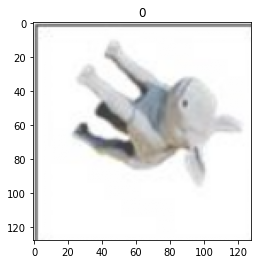

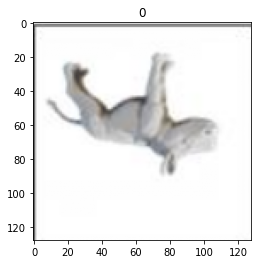

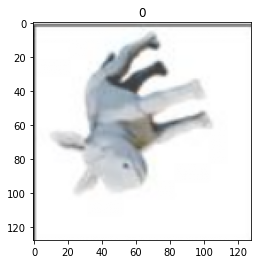

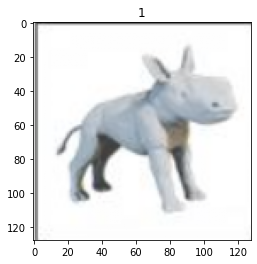

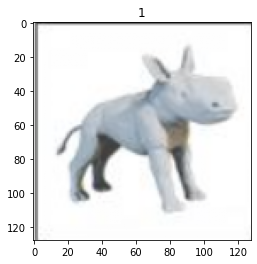

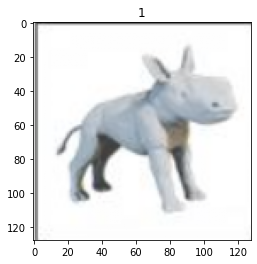

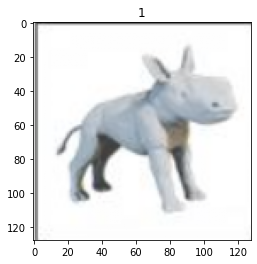

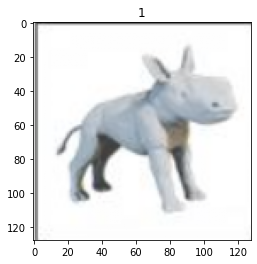

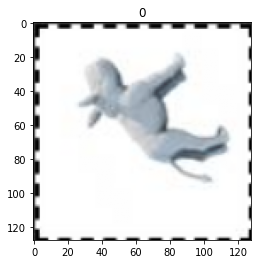

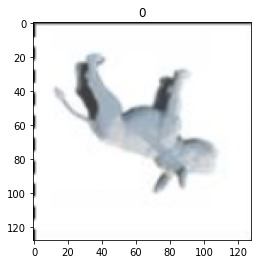

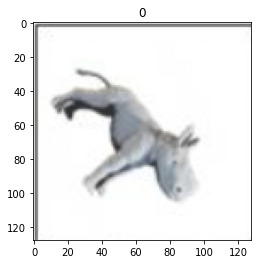

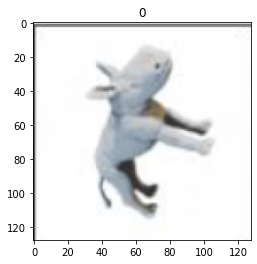

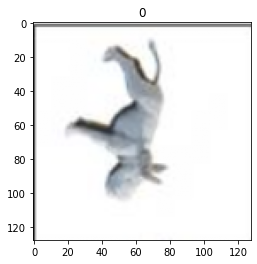

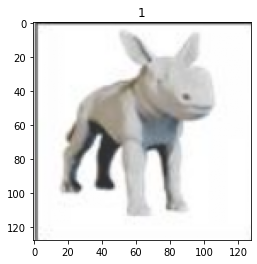

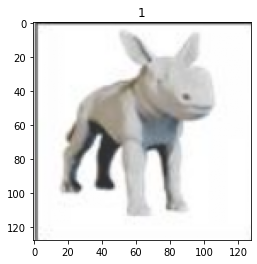

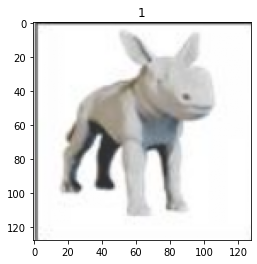

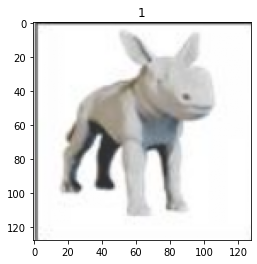

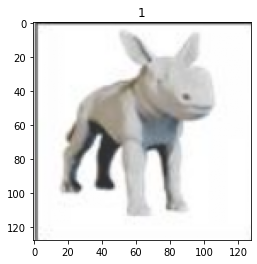

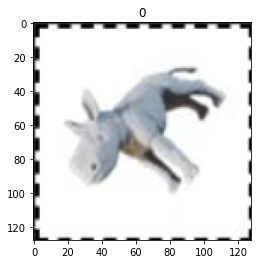

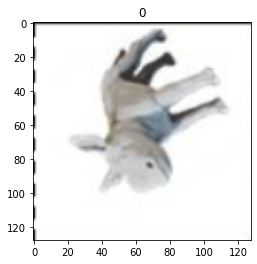

In [ ]:
for i in range(200,220):
  plt.title(y_test[i])
  plt.imshow(x_test[i])
  plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2, VGG16
from tensorflow.keras.layers import Flatten, Dense, Add, Input, Dropout
from tensorflow.keras.models import Sequential , Model

In [ ]:
inp1 = Input((128,128,3))
i2 = VGG16(include_top=False, input_shape=(128,128,3), classifier_activation='relu', weights=None)(inp1)
i3 = Flatten()(i2)
i4 = Dense(256, activation='relu')(i3)
i5 = Dropout(0.2)(i4)
i6 = Dense(64, activation='relu')(i5)
out = Dense(1, activation='sigmoid')(i6)

model = Model(inputs=inp1, outputs=out)
model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 8192)              0         
                                                                 
 dense_27 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                16448     
                                                                 
 dense_29 (Dense)            (None, 1)                 65  

In [ ]:
model.compile('adam',loss='binary_crossentropy', metrics='acc')

In [ ]:
model.optimizer.lr = 0.00001

In [ ]:
model.fit(x_train, y_train, batch_size=64 , epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
66/66 [==============================] - 20s 283ms/step - loss: 0.6859 - acc: 0.6840 - val_loss: 0.6505 - val_acc: 0.9759
Epoch 2/20
66/66 [==============================] - 18s 280ms/step - loss: 0.3259 - acc: 0.9302 - val_loss: 0.0784 - val_acc: 0.9810
Epoch 3/20
66/66 [==============================] - 19s 282ms/step - loss: 0.0547 - acc: 0.9855 - val_loss: 0.0528 - val_acc: 0.9924
Epoch 4/20
66/66 [==============================] - 19s 286ms/step - loss: 0.0363 - acc: 0.9929 - val_loss: 0.0483 - val_acc: 0.9924
Epoch 5/20
66/66 [==============================] - 19s 288ms/step - loss: 0.0299 - acc: 0.9940 - val_loss: 0.0512 - val_acc: 0.9924
Epoch 6/20
66/66 [==============================] - 19s 290ms/step - loss: 0.0281 - acc: 0.9933 - val_loss: 0.0665 - val_acc: 0.9835
Epoch 7/20
66/66 [==============================] - 19s 290ms/step - loss: 0.0269 - acc: 0.9940 - val_loss: 0.0506 - val_acc: 0.9911
Epoch 8/20
66/66 [==============================] - 19s 292ms/step - 

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 18ms/step


array([[0.9999975]], dtype=float32)

In [ ]:
x = x_test[5].reshape((1,128,128,3))

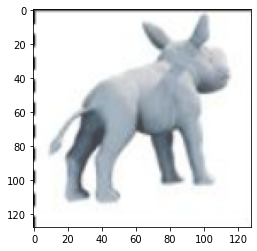

In [ ]:
plt.imshow(x_test[5])

\begin{align}
        p(x) ≈ \frac{1}{N} \sum_{i=1}^N \frac{1}{h^d} exp \left( - \frac{(x-x_i)^T(x-x_i)}{2h^2}\right)
    \end{align}